Importation des librairies

In [1]:
import time
import math
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

Création des données d'apprentissage et de test

In [2]:
nbtirage=100

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
Y_app=np.sin(2*math.pi*(X_app*X_app))+np.random.normal(0,0.1,nbtirage)
Y_test=np.sin(2*math.pi*(X_test*X_test))



Tracé des données

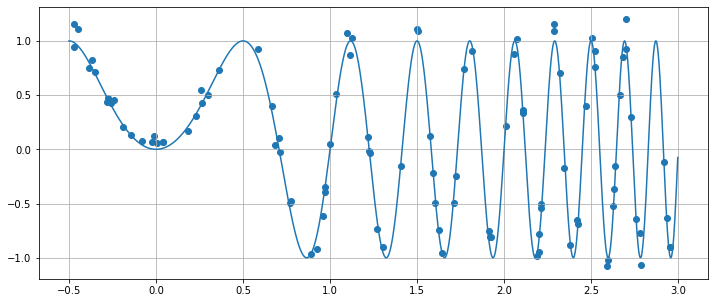

In [3]:
# #############################################################################
plt.figure(figsize=(12,5))
plt.plot(X_test, Y_test)
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()

Apprentissage de la regression

In [47]:
gam=90
alph=0.005


X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))

kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
kr.fit(X_app, Y_app)
Y_kr=kr.predict(X_test)

Tracé du résultat

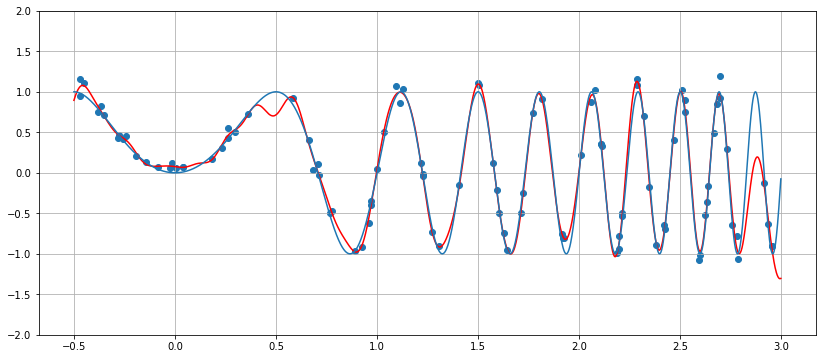

In [48]:
a=plt.figure(figsize=(12,5))
axes= a.add_axes([0.1,0.1,0.9,0.9])
axes.set_ylim([-2,2])
plt.plot(X_test, Y_kr,color='red')
plt.plot(X_test, Y_test)
plt.scatter(X_app, Y_app)
plt.grid()
plt.show()

Evaluation des performances

In [49]:
perf=sum((Y_test-Y_kr)*(Y_test-Y_kr))
print(perf)

41.93631168149689


Conception de différents modèles, 50 échantillons d'apprentissage 

In [60]:
nbtirage=10

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
Y_app=np.sin(2*math.pi*(X_app*X_app))+np.random.normal(0,0.1,nbtirage)
Y_test=np.sin(2*math.pi*(X_test*X_test))
X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))
res_err=np.zeros((100,1))
k=0
Valpha=np.logspace(start=-10,stop=2,num=100)
for alph in Valpha:
    kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
    kr.fit(X_app, Y_app)
    Y_kr=kr.predict(X_test)
    res_err[k]=sum((Y_test-Y_kr)*(Y_test-Y_kr))
    k=k+1

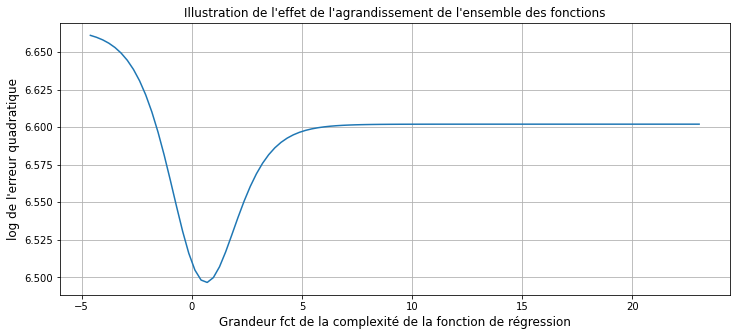

In [61]:
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha),np.log(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('log de l\'erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()

Conception de différents modèles, 100 échantillons d'apprentissage 

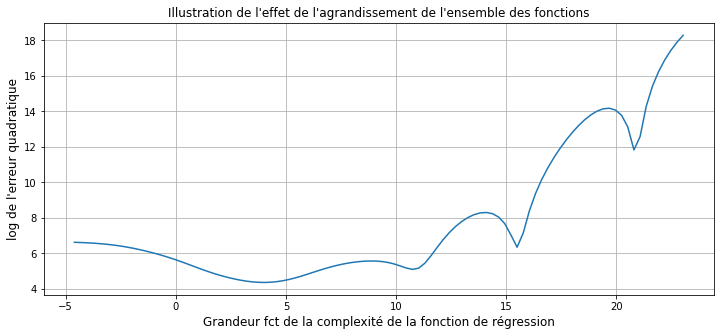

In [63]:
nbtirage=100

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
Y_app=np.sin(2*math.pi*(X_app*X_app))+np.random.normal(0,0.1,nbtirage)
Y_test=np.sin(2*math.pi*(X_test*X_test))
X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))
res_err=np.zeros((100,1))
k=0
Valpha=np.logspace(start=-10,stop=2,num=100)
for alph in Valpha:
    kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
    kr.fit(X_app, Y_app)
    Y_kr=kr.predict(X_test)
    res_err[k]=sum((Y_test-Y_kr)*(Y_test-Y_kr))
    k=k+1
    
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha),np.log(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('log de l\'erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()

Conception de différents modèles, 250 échantillons d'apprentissage 

100


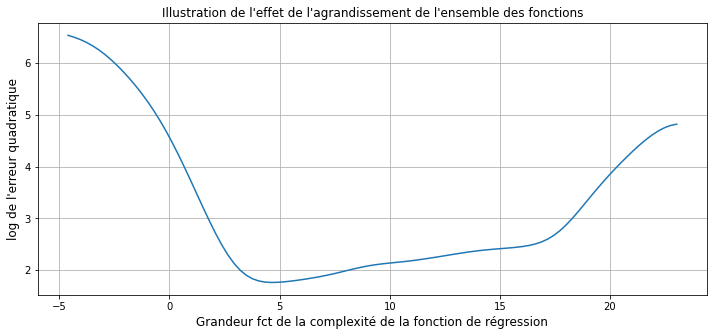

In [64]:
nbtirage=250

X_test=np.arange(-0.5,3,0.002)
X_app=np.random.uniform(-0.5,3,nbtirage)
Y_app=np.sin(2*math.pi*(X_app*X_app))+np.random.normal(0,0.1,nbtirage)
Y_test=np.sin(2*math.pi*(X_test*X_test))
X_app=np.reshape(X_app, (nbtirage, 1))
X_test=np.reshape(X_test, (len(X_test), 1))


res_err=np.zeros((100,1))
k=0
Valpha=np.logspace(start=-10,stop=2,num=100)
for alph in Valpha:
    kr=KernelRidge(kernel='rbf', gamma=gam, alpha=alph)
    kr.fit(X_app, Y_app)
    Y_kr=kr.predict(X_test)
    res_err[k]=sum((Y_test-Y_kr)*(Y_test-Y_kr))
    k=k+1
print(k)    
plt.figure(figsize=(12,5))
plt.plot(-np.log(Valpha),np.log(res_err))
plt.xlabel('Grandeur fct de la complexité de la fonction de régression', fontsize=12)
plt.ylabel('log de l\'erreur quadratique', fontsize=12)
plt.title('Illustration de l\'effet de l\'agrandissement de l\'ensemble des fonctions')           
plt.grid()
plt.show()